In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics



In [ ]:
####Load DATA

In [3]:
training = pd.read_csv('/Users/Duygu/Desktop/yassir/data/Train.csv').set_index('ID')
training['Timestamp'] = pd.to_datetime(training['Timestamp'])
training.head()



,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
ID,,,,,,,
000FLWA8,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784
000RGOAM,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576
001QSGIH,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526
002ACV6R,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130
0039Y7A8,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138


In [4]:
testing = pd.read_csv('/Users/Duygu/Desktop/yassir/data/Test.csv').set_index('ID')
testing['Timestamp'] = pd.to_datetime(testing['Timestamp'])
testing.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance
ID,,,,,,
000V4BQX,2019-12-21 05:52:37+00:00,2.981,36.688,2.978,36.754,17549
003WBC5J,2019-12-25 21:38:53+00:00,3.032,36.769,3.074,36.751,7532
004O4X3A,2019-12-29 21:30:29+00:00,3.035,36.711,3.010,36.758,10194
006CEI5B,2019-12-31 22:51:57+00:00,2.902,36.738,3.208,36.698,32768
009G0M2T,2019-12-28 21:47:22+00:00,2.860,36.692,2.828,36.696,4513


In [5]:
##feature engineering and merging test and train data for cleaning
testing['test']=True
training['test']=False

testing=training.append(testing)
testing["speed"]=testing.apply(lambda x : (x["Trip_distance"] / x['ETA'] )* (3.6) if x['test']==False else None,axis="columns")
testing.head()

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,test,speed
ID,,,,,,,,,
000FLWA8,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784.0,False,51.241810
000RGOAM,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576.0,False,24.487500
001QSGIH,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526.0,False,49.722433
002ACV6R,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130.0,False,26.856230
0039Y7A8,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138.0,False,61.649579


In [6]:
##clean and organize data
testing = testing.drop_duplicates()
##remove irrational data
clean  = (testing.test==False) & (  (testing.speed>100)|  (testing.ETA<10 )   | ( testing.Trip_distance<1 | ( (testing.Trip_distance<1 )  & (testing.ETA < 60) )   ) )


a = testing.drop(testing[clean].index)



In [7]:
a['ETA'].isna().sum()

35545

In [8]:
##remove na values
a.dropna(subset = ["ETA"], inplace=True)


In [9]:
a.dropna(subset = ["speed"], inplace=True)

In [10]:
a

,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,test,speed
ID,,,,,,,,,
000FLWA8,2019-12-04 20:01:50+00:00,3.258,36.777,3.003,36.718,39627,2784.0,False,51.241810
000RGOAM,2019-12-10 22:37:09+00:00,3.087,36.707,3.081,36.727,3918,576.0,False,24.487500
001QSGIH,2019-11-23 20:36:10+00:00,3.144,36.739,3.088,36.742,7265,526.0,False,49.722433
002ACV6R,2019-12-01 05:43:21+00:00,3.239,36.784,3.054,36.763,23350,3130.0,False,26.856230
0039Y7A8,2019-12-17 20:30:20+00:00,2.912,36.707,3.207,36.698,36613,2138.0,False,61.649579
...,...,...,...,...,...,...,...,...,...
ZZXN4JH2,2019-11-30 23:21:58+00:00,3.121,36.743,3.032,36.770,10321,664.0,False,55.957229
ZZXQ5AQJ,2019-11-27 05:59:31+00:00,3.024,36.749,2.951,36.735,10791,1056.0,False,36.787500
ZZXYPKGU,2019-12-06 05:04:06+00:00,3.189,36.721,3.186,36.721,1139,296.0,False,13.852703


In [12]:
##bin speed and distance to categorize
a['speed category']=pd.cut(a['speed'], bins=[0, 20, 60, 89], include_lowest=True, labels=['low', 'mid', 'high'])

In [13]:
a['distance category']=pd.cut(a['Trip_distance'], bins=[0, 10000, 30000, 62028], include_lowest=True, labels=['close', 'mid', 'far'])


<AxesSubplot:title={'center':'Does distance affect ETA'}, xlabel='Trip_distance', ylabel='ETA'>

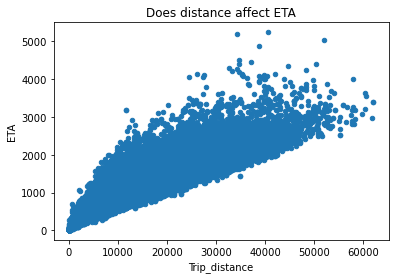

In [14]:
##check if distance has any impact on ETA
a.plot.scatter(x='Trip_distance', y='ETA', title='Does distance affect ETA')


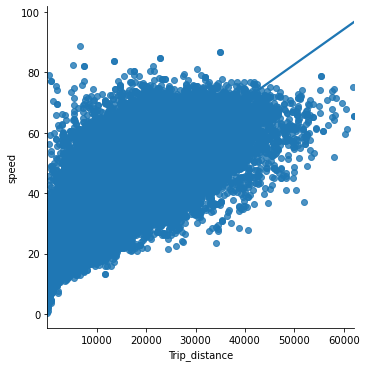

In [15]:
##see if speed and distance correlated
sns.lmplot(data=a, x='Trip_distance', y='speed')

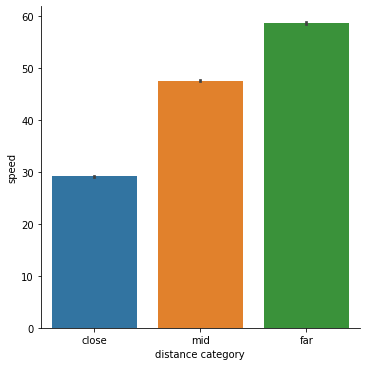

In [16]:
sns.catplot(x="distance category", y="speed",  data=a, kind="bar")

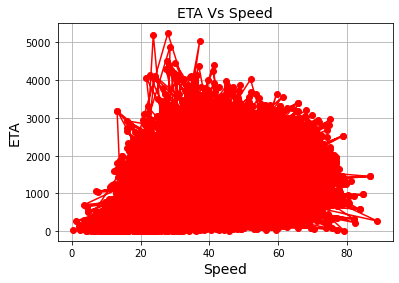

In [17]:
plt.plot(a["speed"], a["ETA"], color='red', marker='o')
plt.title('ETA Vs Speed', fontsize=14)
plt.xlabel('Speed', fontsize=14)
plt.ylabel('ETA', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
##fit and build a regression model

In [11]:
independent_variables = ["Trip_distance","speed"]
target_variable = "ETA"
X = a[independent_variables]
y = a[target_variable]

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)  
model.fit(X_train, y_train)
predictions = model.predict(X_test) 
X = X_test.reset_index().copy()
X["ETA"] = y_test.tolist()
X["predicted ETA"] = predictions
X.head()

,ID,Trip_distance,speed,ETA,predicted ETA
0,NEAJ569G,21303,47.693284,1608.0,1567.298295
1,UL53YQKH,22764,49.457091,1657.0,1645.452155
2,3UJQEIJ8,1667,11.930815,503.0,756.590164
3,KJKIGQ9K,19462,49.167158,1425.0,1395.331371
4,M0WASKFN,3612,32.671357,398.0,494.991889


In [12]:
rsq = metrics.r2_score(y_test, predictions)
print(f"the R-squaared score is {rsq}")

the R-squaared score is 0.9036451962703553
